### **Predicción del Clima: Proyecto de Análisis de Datos Meteorológicos**  

#### **Descripción del Conjunto de Datos**  
Este proyecto tiene como objetivo predecir el clima utilizando un conjunto de datos proporcionado. Se pueden eliminar las columnas innecesarias y se debe usar la columna de descripción como variable de salida.  

#### **Detalles del Archivo**  
El archivo **weather_data.csv** contiene 34 columnas, de las cuales destacan las siguientes:  

- **Fecha**: Fecha de la predicción meteorológica en formato AAAA-MM-DD.  
- **Temperatura (°C)**: Temperatura media del día, incluyendo máxima, mínima y promedio.  
- **Precipitación (mm)**: Cantidad total de lluvia o nieve en el día, medida en milímetros (mm). Puede incluir lluvia, nieve, aguanieve o granizo.  
- **Velocidad del Viento (km/h)**: Velocidad promedio del viento en kilómetros por hora (km/h), incluyendo ráfagas y velocidad sostenida. También se registra la dirección del viento.  
- **Condición Climática**: Descripción en texto del clima, como soleado, nublado, lluvioso, nevado, ventoso o con niebla.  
- **Humedad (%)**: Promedio de la humedad relativa diaria, expresada en porcentaje (%), incluyendo valores máximos y mínimos.  
- **Presión Atmosférica (hPa)**: Presión atmosférica promedio del día en hectopascales (hPa), incluyendo presión a nivel del mar y en la estación meteorológica, además de la tendencia de presión.  

#### **Resumen del Proyecto**  
El objetivo es desarrollar un modelo de clasificación que prediga las condiciones meteorológicas basándose en los datos históricos. Se pueden realizar análisis exploratorios, limpieza de datos y entrenar modelos de aprendizaje automático para mejorar la precisión de las predicciones.

# Dependencias Usadas

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Importación de Datos

In [34]:
df = pd.read_csv("weather_data.csv")
df.head()

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,2025-01-15T12:00:00,25.9,18.7,0,0,NNW,51,...,0,350,0,0,0.00000,11.9,2025-01-15T07:00:00,Few clouds,801,c02n
1,385,87,0.0,2025-01-15T15:00:00,29.3,22.8,748,0,NNW,41,...,0,360,0,0,384.62994,11.9,2025-01-15T10:00:00,Clear Sky,800,c01d
2,542,101,0.0,2025-01-15T18:00:00,36.5,32.0,831,0,NNW,30,...,0,340,0,0,542.37920,9.6,2025-01-15T13:00:00,Few clouds,801,c02d
3,193,65,0.0,2025-01-15T21:00:00,38.3,35.6,581,0,NW,28,...,0,310,0,0,192.98000,6.9,2025-01-15T16:00:00,Clear Sky,800,c01d
4,0,0,0.0,2025-01-16T00:00:00,29.3,27.5,0,0,W,46,...,0,280,0,0,0.00000,2.0,2025-01-15T19:00:00,Few clouds,801,c02n


# Visualización y detección de datos

In [35]:
df.isnull().sum() # 0 Datos Nulos

,0
ghi,0
dhi,0
precip,0
timestamp_utc,0
temp,0
app_temp,0
dni,0
snow_depth,0
wind_cdir,0
rh,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

# **Resumen de los datos relevantes extraídos de la descripción estadística del DataFrame**

In [37]:
df.describe()

,ghi,dhi,precip,temp,app_temp,dni,snow_depth,rh,pop,ozone,...,pres,dewpt,uv,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,code
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.00000,40.000000,40.000000,40.0,40.00000,40.000000,40.000000,40.00000
mean,142.300000,31.875000,0.003625,37.200000,35.140000,271.675000,0.0,69.800000,7.625000,318.750000,...,1011.825000,27.137500,0.70000,24.975000,265.875000,0.0,30.37500,114.497583,8.070000,769.80000
std,206.094477,42.657363,0.008548,7.995223,9.249665,360.709656,0.0,21.294275,15.441681,21.042996,...,5.848022,11.898517,1.01779,40.780518,63.467006,0.0,42.95059,175.889617,3.618202,117.68258
min,0.000000,0.000000,0.000000,21.900000,18.700000,0.000000,0.0,28.000000,0.000000,292.000000,...,1003.000000,8.100000,0.00000,0.000000,160.000000,0.0,0.00000,0.000000,1.100000,301.00000
25%,0.000000,0.000000,0.000000,31.450000,27.450000,0.000000,0.0,54.750000,0.000000,303.750000,...,1006.750000,18.450000,0.00000,0.000000,210.000000,0.0,0.00000,0.000000,5.800000,801.00000
50%,0.000000,0.000000,0.000000,37.600000,34.700000,0.000000,0.0,75.500000,0.000000,311.500000,...,1013.000000,27.300000,0.00000,0.000000,265.000000,0.0,0.00000,0.000000,8.300000,801.00000
75%,251.500000,72.000000,0.000000,44.175000,42.850000,635.500000,0.0,84.500000,0.000000,332.500000,...,1016.000000,38.650000,1.25000,40.750000,330.000000,0.0,71.25000,193.830832,10.800000,803.00000
max,557.000000,102.000000,0.040000,50.200000,50.200000,836.000000,0.0,100.000000,55.000000,371.000000,...,1023.000000,45.300000,3.00000,100.000000,360.000000,0.0,100.00000,549.339200,15.700000,804.00000


**Promedios y Tendencias**
- **Temperatura Media (`temp`)**: 37.2°C (mínima de 21.9°C, máxima de 50.2°C).
- **Temperatura Aparente (`app_temp`)**: 35.14°C, similar a la temperatura real.
- **Precipitación (`precip`)**: En general, baja, con un promedio de **0.0036 mm**, pero con un máximo de **0.04 mm**.
- **Humedad Relativa (`rh`)**: Media del **69.8%**, con un máximo del **100%**, indicando condiciones de alta humedad en algunos momentos.
- **Presión Atmosférica (`pres`)**: Promedio de **1011.8 hPa**, variando entre **1003 hPa** y **1023 hPa**.
- **Dirección del Viento (`wind_dir`)**: Media de **265.87°**, indicando predominio de vientos del oeste.
- **Velocidad Máxima de Ráfagas (`wind_gust_spd`)**: Promedio de **8.07 km/h**, con un máximo de **15.7 km/h**.
- **Nieve (`snow`)**: No se registraron acumulaciones de nieve (valores en 0).
- **Profundidad de la Nieve (`snow_depth`)**: No se registró acumulación (0 en toda la muestra).
- **Índice UV (`uv`)**: Promedio bajo de **0.7**, pero con un pico de **3**, lo que indica que en ciertos momentos hubo niveles de radiación solar moderados.
- **Radiación Solar (`solar_rad`)**: Media de **114.5 W/m²**, con valores máximos de **549.3 W/m²**, indicando una fuerte exposición solar en algunos periodos.

**Niveles de Nubosidad**
- **Nubosidad Media (`clouds_mid`)**: **24.97%**, con un máximo del **100%**, lo que sugiere días muy despejados y otros completamente nublados.
- **Nubosidad Baja (`clouds_low`)**: Media del **30.37%**, con valores máximos del **100%**, indicando variabilidad en la cobertura de nubes bajas.

**Otros Factores Relevantes**
- **Ozono (`ozone`)**: Media de **318.75 DU**, con un máximo de **371 DU**, lo que puede influir en la calidad del aire.
- **Probabilidad de Precipitación (`pop`)**: Media baja de **7.6%**, con un máximo del **55%**, lo que indica que en general hay pocas posibilidades de lluvia.

**Conclusiones Generales**
- Predominan condiciones secas, con temperaturas altas y baja precipitación.
- Alta variabilidad en la nubosidad y humedad.
- La radiación solar es intensa en ciertos momentos del día.
- La velocidad del viento es moderada, sin ráfagas extremas.

# Gráficas de distribución


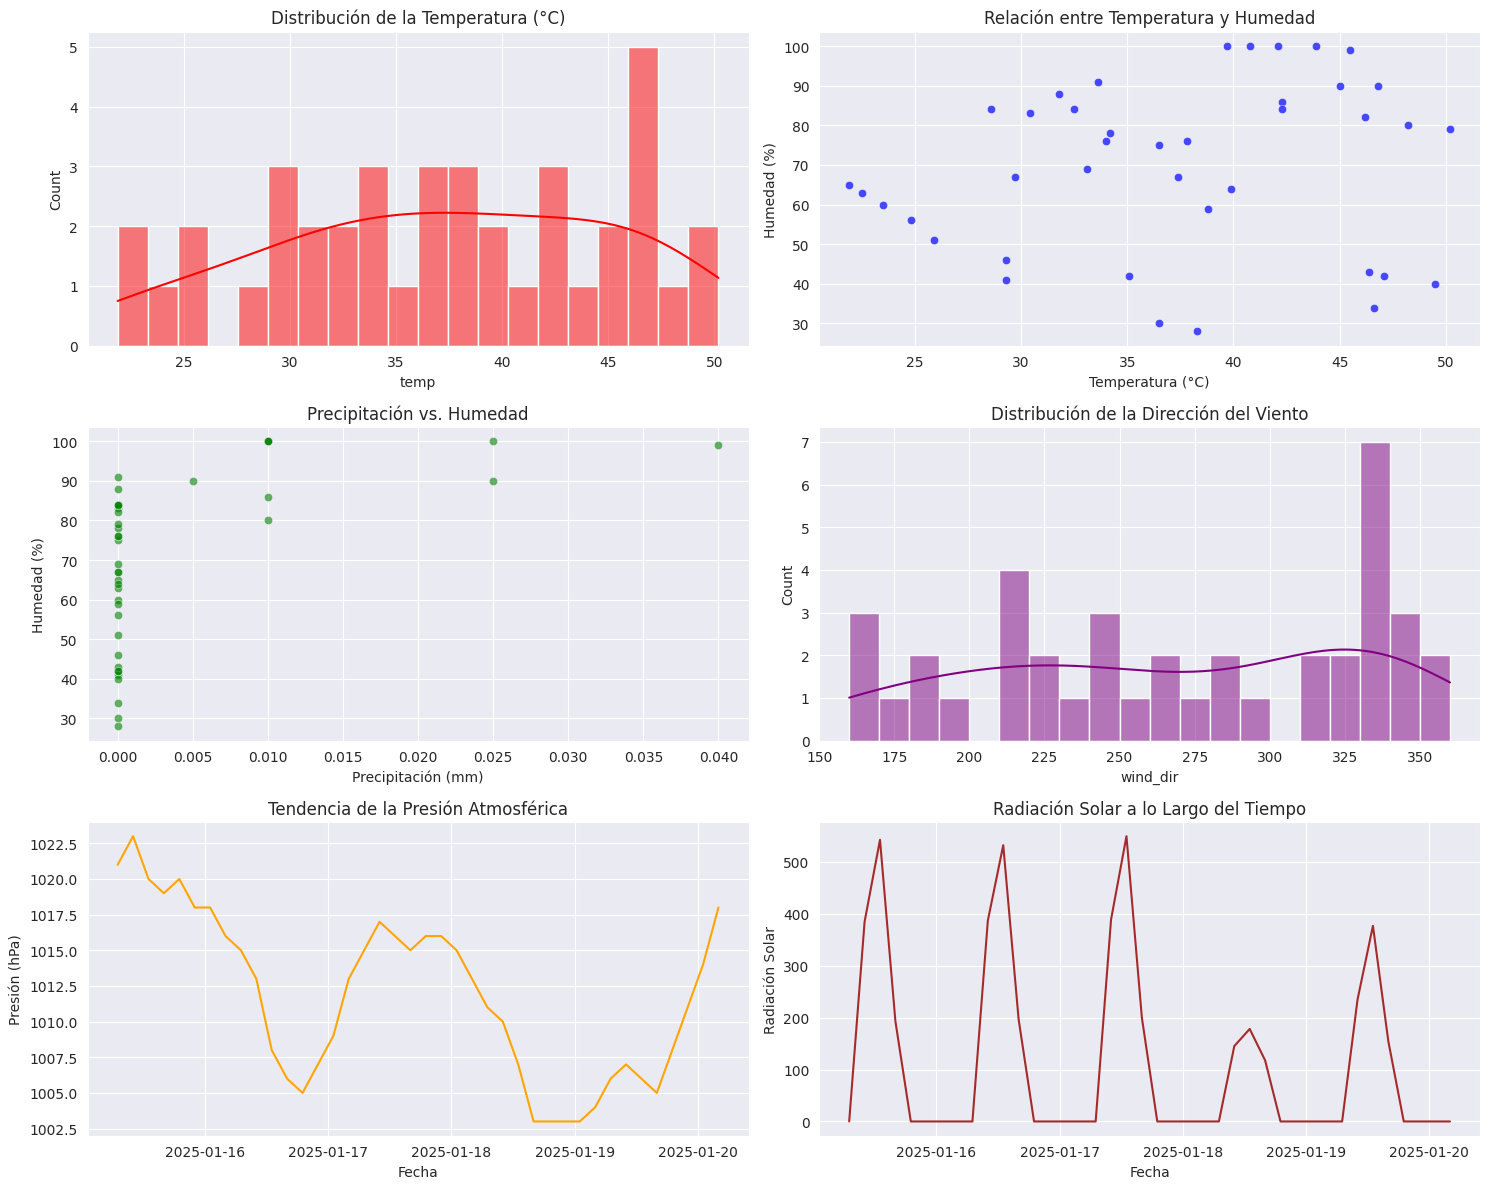

In [38]:
# Configuración de estilo
sns.set_style("darkgrid")

# Figura general
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Distribución de la temperatura
sns.histplot(df["temp"], bins=20, kde=True, ax=axes[0, 0], color="red")
axes[0, 0].set_title("Distribución de la Temperatura (°C)")

# 2. Relación entre temperatura y humedad
sns.scatterplot(x=df["temp"], y=df["rh"], alpha=0.7, ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Relación entre Temperatura y Humedad")
axes[0, 1].set_xlabel("Temperatura (°C)")
axes[0, 1].set_ylabel("Humedad (%)")

# 3. Precipitación vs. Humedad
sns.scatterplot(x=df["precip"], y=df["rh"], ax=axes[1, 0], color="green", alpha=0.6)
axes[1, 0].set_title("Precipitación vs. Humedad")
axes[1, 0].set_xlabel("Precipitación (mm)")
axes[1, 0].set_ylabel("Humedad (%)")

# 4. Distribución de la dirección del viento
sns.histplot(df["wind_dir"], bins=20, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribución de la Dirección del Viento")

# 5. Tendencia de la presión atmosférica
sns.lineplot(x=pd.to_datetime(df["timestamp_local"]), y=df["pres"], ax=axes[2, 0], color="orange")
axes[2, 0].set_title("Tendencia de la Presión Atmosférica")
axes[2, 0].set_xlabel("Fecha")
axes[2, 0].set_ylabel("Presión (hPa)")

# 6. Radiación solar a lo largo del tiempo
sns.lineplot(x=pd.to_datetime(df["timestamp_local"]), y=df["solar_rad"], ax=axes[2, 1], color="brown")
axes[2, 1].set_title("Radiación Solar a lo Largo del Tiempo")
axes[2, 1].set_xlabel("Fecha")
axes[2, 1].set_ylabel("Radiación Solar")

# Ajustar el diseño
plt.tight_layout()
plt.show()


### Seis visualizaciones clave del dataset:

1. **Distribución de la temperatura**: La mayoría de los valores de temperatura están entre 20°C y 50°C, con una distribución relativamente uniforme.
2. **Relación entre temperatura y humedad**: Se observa una correlación inversa, donde temperaturas más altas tienden a corresponder con niveles más bajos de humedad.
3. **Precipitación vs. humedad**: La precipitación es baja en general y parece estar más presente cuando la humedad es alta.
4. **Distribución de la dirección del viento**: La dirección del viento está distribuida en múltiples direcciones, con picos en ciertos ángulos.
5. **Tendencia de la presión atmosférica**: Se observan fluctuaciones a lo largo del tiempo, lo que podría indicar cambios en las condiciones climáticas.
6. **Radiación solar a lo largo del tiempo**: La radiación sigue un patrón cíclico, con picos en ciertos momentos del día.


# Creación Modelo

In [39]:
cols = ['timestamp_utc', 'datetime', 'timestamp_local']
df.drop(cols, axis=1, inplace=True)

In [40]:
features = df[[
    "temp",          # Temperatura
    "app_temp",      # Temperatura aparente
    "rh",            # Humedad relativa
    "precip",        # Precipitación
    "pres",          # Presión atmosférica
    "dewpt",         # Punto de rocío
    "wind_spd",      # Velocidad del viento
    "wind_gust_spd", # Ráfagas de viento
    "wind_dir",      # Dirección del viento
    "clouds_low",    # Cobertura de nubes bajas
    "clouds_mid",    # Cobertura de nubes medias
    "clouds",        # Cobertura total de nubes
    "solar_rad",     # Radiación solar
    "uv",            # Índice UV
    "pop",           # Probabilidad de precipitación
    "snow_depth",    # Profundidad de nieve
    "ozone"          # Nivel de ozono
]]

In [41]:
# Assuming 'description(output)' is the original column with weather descriptions:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
#X_scaled = scaler.fit_transform(x.select_dtypes(include=['float64', 'int64']))
y = df['description(output)']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30, random_state=42)


In [43]:
rf = RandomForestClassifier(class_weight='balanced')
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.8333333333333334

In [44]:
print(classification_report(y_test, model.predict(x_test)))

                  precision    recall  f1-score   support

   Broken clouds       1.00      1.00      1.00         1
       Clear Sky       0.00      0.00      0.00         1
         Drizzle       1.00      1.00      1.00         1
      Few clouds       0.75      1.00      0.86         6
 Overcast clouds       1.00      1.00      1.00         2
Scattered clouds       0.00      0.00      0.00         1

        accuracy                           0.83        12
       macro avg       0.62      0.67      0.64        12
    weighted avg       0.71      0.83      0.76        12



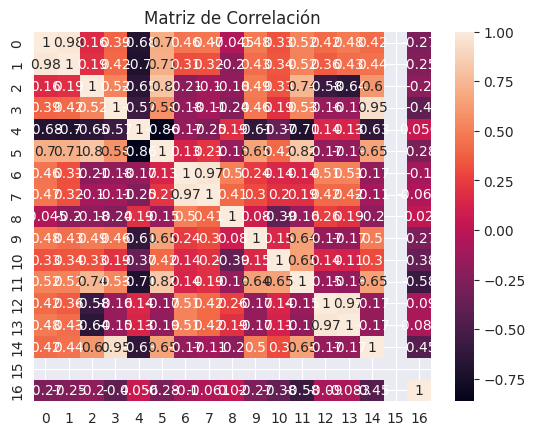

In [45]:
correlation_matrix = pd.DataFrame(X_scaled).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

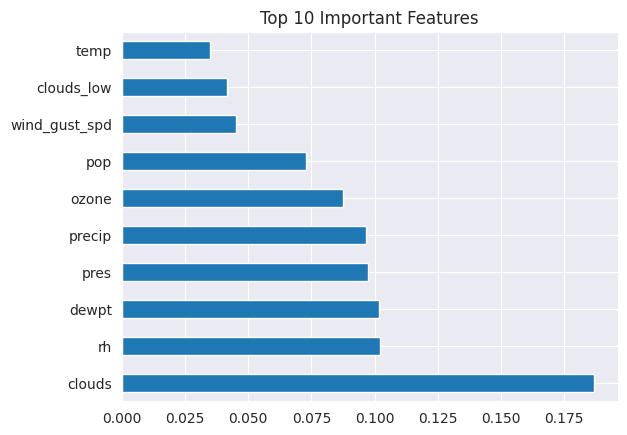

In [54]:
feat_importances = pd.Series(model.feature_importances_, index=features.select_dtypes(include=['float64', 'int64']).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

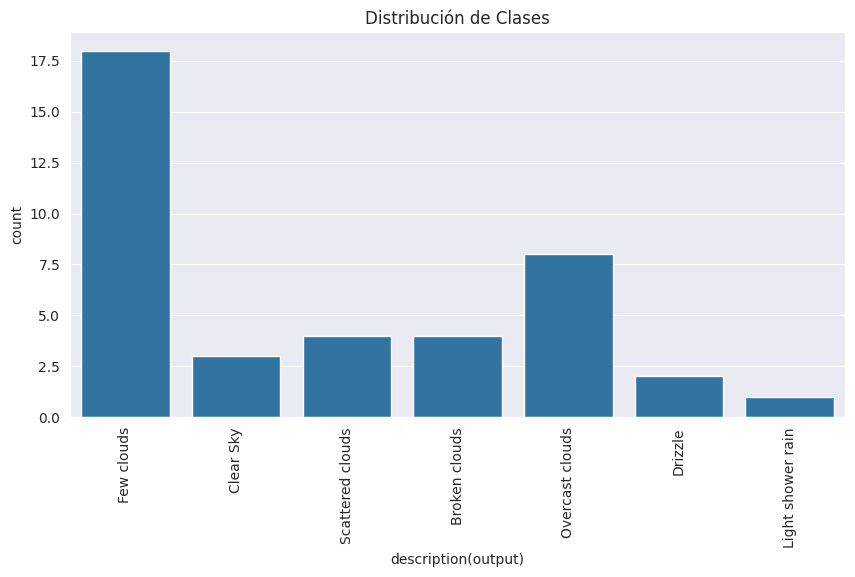

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["description(output)"])
plt.xticks(rotation=90)
plt.title("Distribución de Clases")
plt.show()

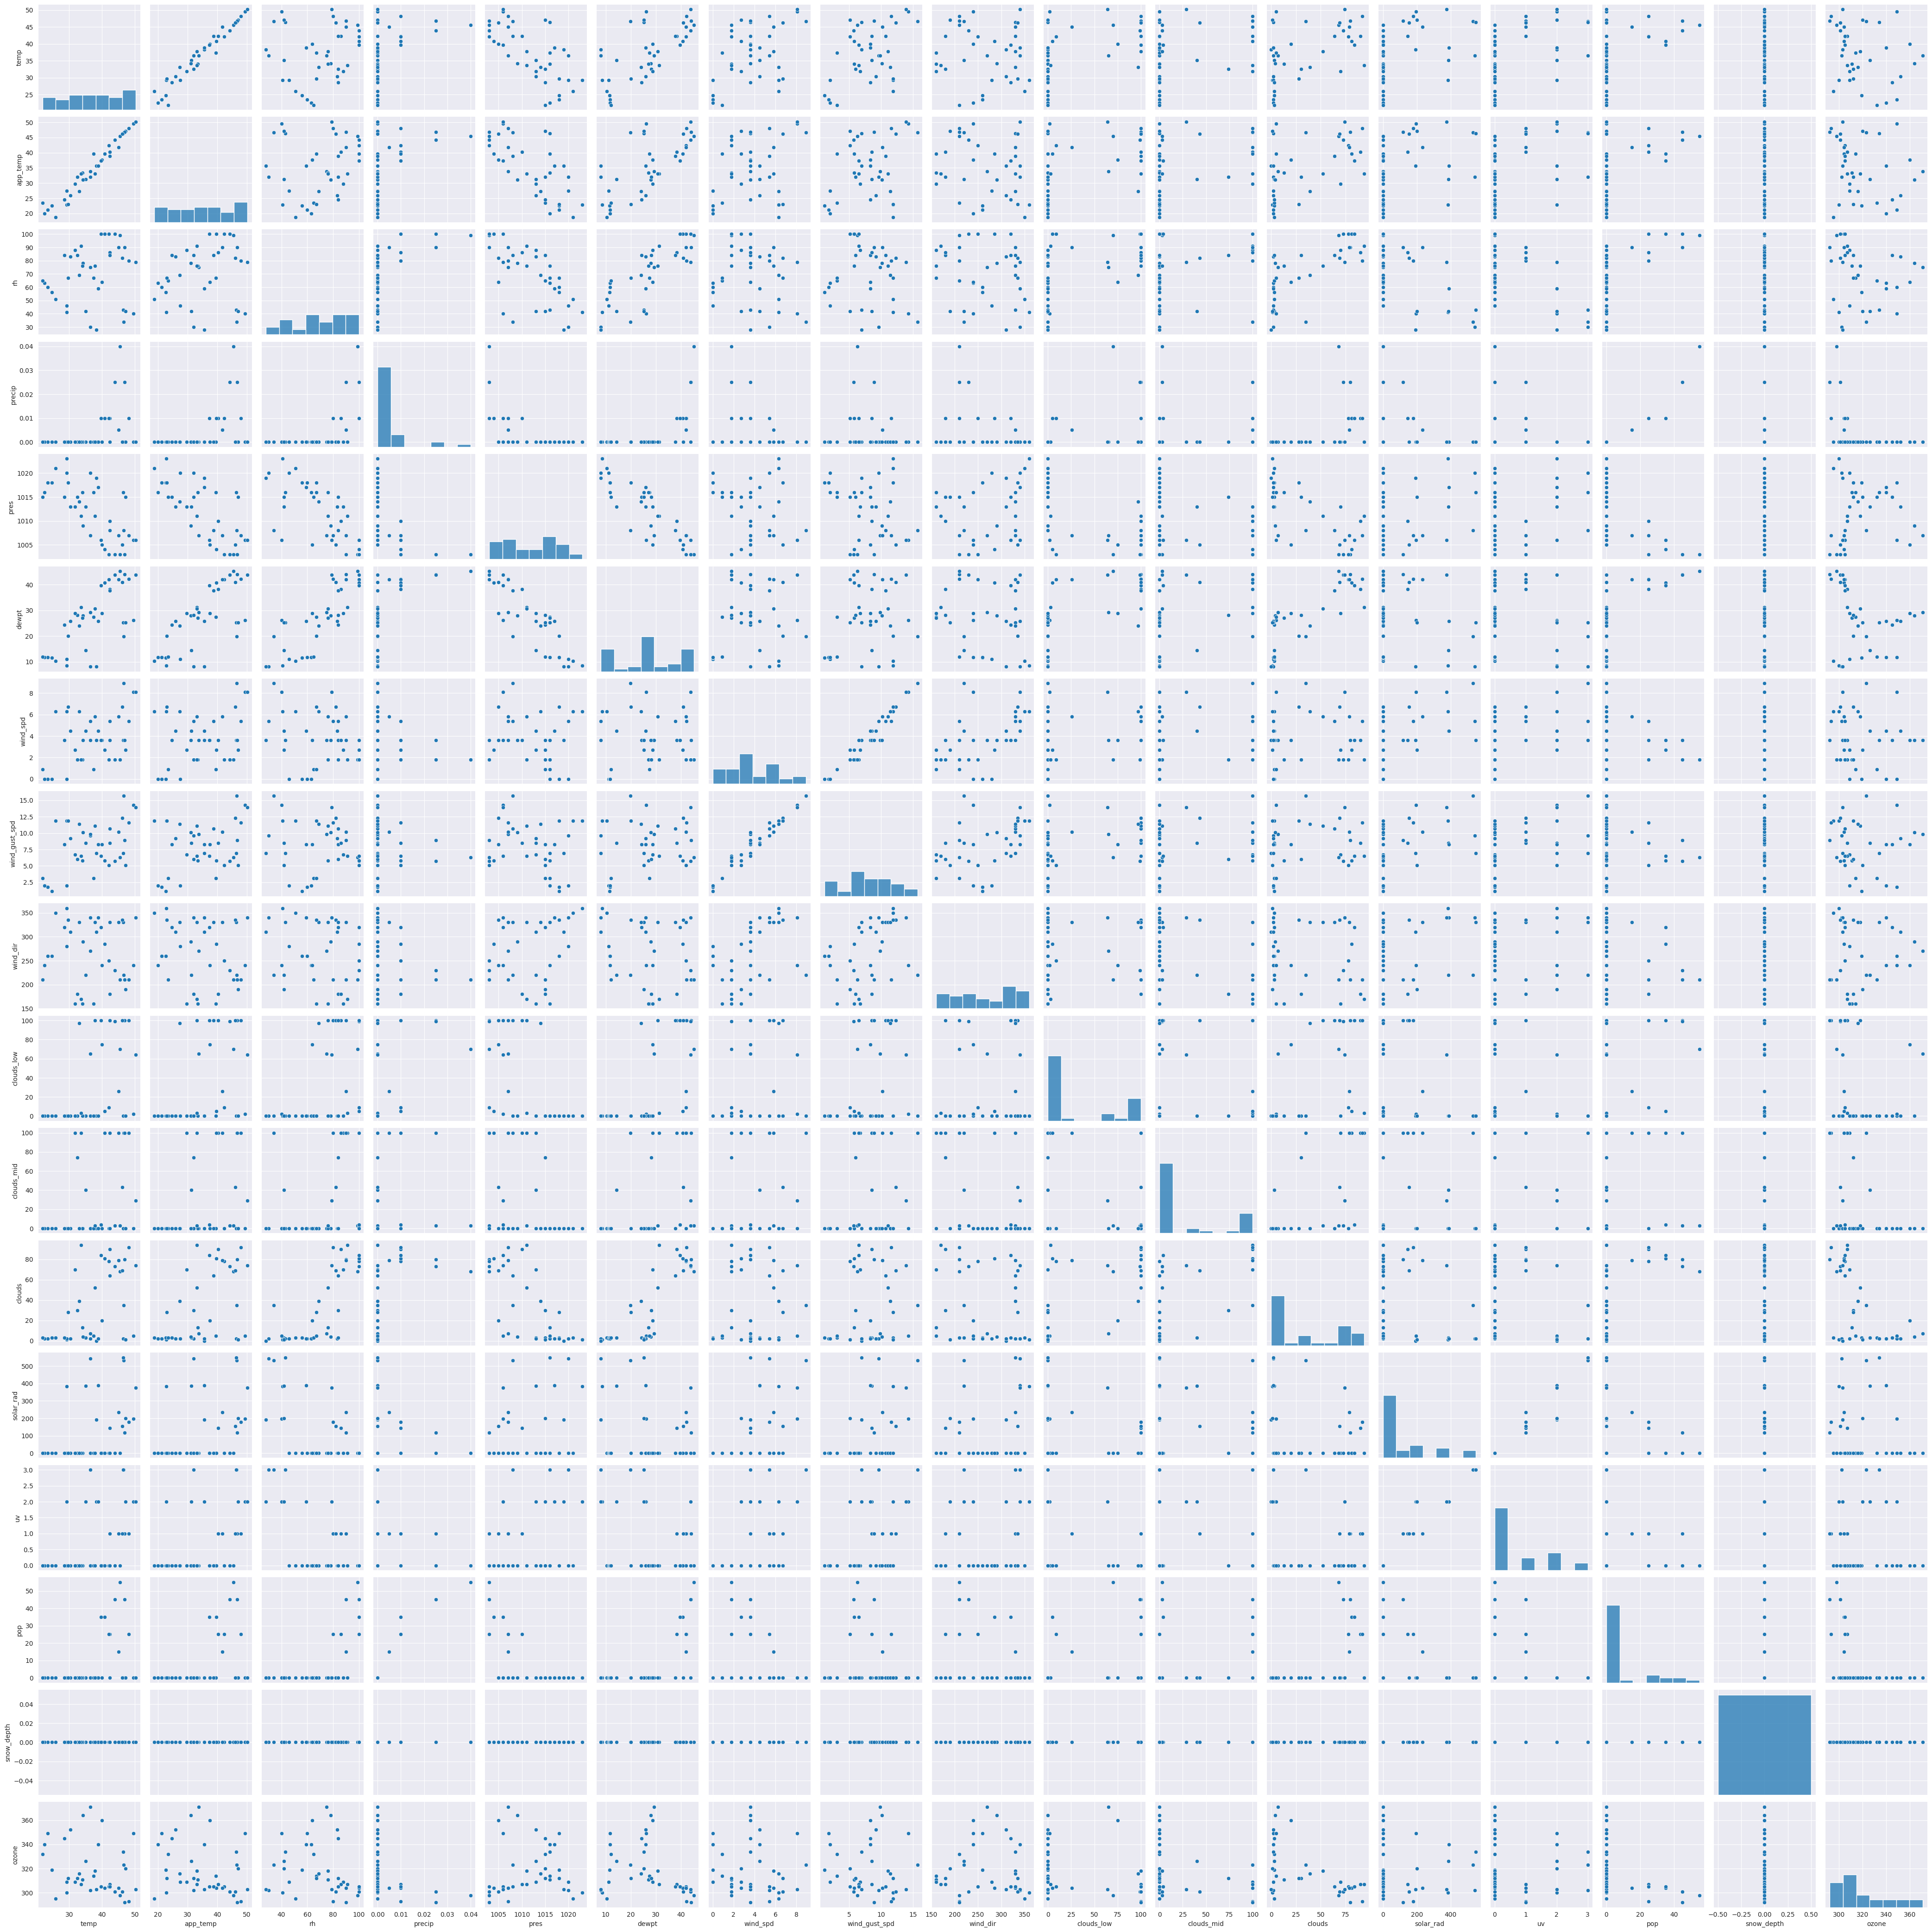

In [51]:
sns.pairplot(features)
plt.show()

# Informe

# Informe del Proyecto de Análisis de Datos Meteorológicos

## Acerca de este archivo

**Sugerir Ediciones**

A continuación se describen las columnas del dataset junto con la referencia correspondiente para cada una:

- **Fecha** (Referencia: *Date*)  
  Fecha del pronóstico del tiempo, típicamente en formato **YYYY-MM-DD**.

- **Temperatura (°C)** (Referencia: *Temperature (°C)*)  
  Temperatura promedio del día, medida en grados Celsius (°C). Esto puede incluir:  
  - Temperatura máxima  
  - Temperatura mínima  
  - Temperatura promedio

- **Precipitación (mm)** (Referencia: *Precipitation (mm)*)  
  Cantidad total de lluvia o nieve del día, medida en milímetros (mm). Esto puede incluir:  
  - Lluvia  
  - Nieve  
  - Aguanieve  
  - Granizo

- **Velocidad del Viento (km/h)** (Referencia: *Wind Speed (km/h)*)  
  Velocidad promedio del viento durante el día, medida en kilómetros por hora (km/h). Esto puede incluir:  
  - Velocidad sostenida  
  - Velocidad de ráfagas  
  - Dirección del viento

- **Condición Meteorológica** (Referencia: *Weather Condition*)  
  Descripción textual del clima, por ejemplo:  
  - Soleado  
  - Nublado  
  - Lluvioso  
  - Nevado  
  - Ventoso  
  - Con niebla

- **Humedad (%)** (Referencia: *Humidity (%)*)  
  Humedad relativa promedio del día, medida como un porcentaje (%). Esto puede incluir:  
  - Humedad relativa promedio  
  - Humedad relativa máxima  
  - Humedad relativa mínima

- **Presión (hPa)** (Referencia: *Pressure (hPa)*)  
  Presión atmosférica promedio del día, medida en hectopascales (hPa). Esto puede incluir:  
  - Presión a nivel del mar  
  - Presión en la estación  
  - Tendencia de la presión

---

## 1. Descripción del Dataset

El proyecto se basa en un dataset de datos meteorológicos obtenido del archivo `weather_data.csv`. Este dataset cuenta con 34 columnas que capturan una amplia gama de variables relacionadas con el clima. Entre las variables destacadas se encuentran:

- **Variables de radiación solar:**  
  `ghi`, `dhi`, `dni`, `solar_rad`, `uv`.

- **Variables de temperatura:**  
  `temp` (temperatura), `app_temp` (sensación térmica).

- **Variables de humedad y punto de rocío:**  
  `rh` (humedad relativa), `dewpt` (punto de rocío).

- **Variables relacionadas con precipitaciones y nieve:**  
  `precip`, `snow`, `snow_depth`.

- **Variables de viento:**  
  `wind_spd` (velocidad del viento), `wind_gust_spd` (ráfagas de viento), `wind_dir` (dirección del viento).

- **Variables de nubosidad:**  
  `clouds_low` (nubes bajas), `clouds_mid` (nubes medias), `clouds` (nubes totales).

- **Otras variables atmosféricas:**  
  `pres` (presión atmosférica), `pop` (probabilidad de precipitación), `ozone` (nivel de ozono), entre otras.

---

## 2. Selección de Variables para el Análisis

Para llevar a cabo un análisis exploratorio se seleccionaron las siguientes variables:

```python
features = df[[
    "temp",          # Temperatura
    "app_temp",      # Temperatura aparente
    "rh",            # Humedad relativa
    "precip",        # Precipitación
    "pres",          # Presión atmosférica
    "dewpt",         # Punto de rocío
    "wind_spd",      # Velocidad del viento
    "wind_gust_spd", # Ráfagas de viento
    "wind_dir",      # Dirección del viento
    "clouds_low",    # Cobertura de nubes bajas
    "clouds_mid",    # Cobertura de nubes medias
    "clouds",        # Cobertura total de nubes
    "solar_rad",     # Radiación solar
    "uv",            # Índice UV
    "pop",           # Probabilidad de precipitación
    "snow_depth",    # Profundidad de nieve
    "ozone"          # Nivel de ozono
]]
```

Estas variables permiten explorar tanto las condiciones climáticas inmediatas (como temperatura, humedad y presión) como fenómenos asociados (radiación, nubosidad, viento y precipitaciones).

---

## 3. Análisis Exploratorio con Pairplot

Se generó un **pairplot** utilizando la librería Seaborn, el cual ofrece una visualización multivariable para:

- **Observar distribuciones individuales:**  
  En la diagonal del pairplot se muestran histogramas o gráficos de densidad para cada variable. Esto facilita la identificación de la forma de la distribución, detecta posibles sesgos y evidencia la presencia de valores atípicos.

- **Estudiar relaciones bivariadas:**  
  Cada subgráfico fuera de la diagonal representa la relación entre dos variables, donde:  
  - **Eje Y:** Representa los valores de la variable asignada a la fila.  
  - **Eje X:** Representa los valores de la variable asignada a la columna.

  Por ejemplo, al comparar `temp` (temperatura) contra `app_temp` (sensación térmica), se puede verificar la relación directa esperada. O bien, al observar la relación entre `precip` (precipitación) y `temp`, se pueden identificar tendencias, como una posible disminución de la temperatura en días de alta precipitación.

- **Detección de correlaciones:**  
  La disposición de los puntos en cada gráfico permite identificar:  
  - **Correlación positiva:** A medida que aumenta la variable en el eje X, la variable en el eje Y también aumenta.  
  - **Correlación negativa:** Un aumento en la variable del eje X se asocia con una disminución en la variable del eje Y.  
  - **Ausencia de correlación:** Los puntos se distribuyen aleatoriamente, sin mostrar una tendencia definida.

Este análisis visual es esencial para detectar patrones y relaciones entre variables, lo cual puede guiar estudios posteriores o el desarrollo de modelos predictivos.

---

## 4. Conclusiones y Observaciones

- **Relaciones Evidentes:**  
  Se han identificado correlaciones positivas esperadas, como entre `temp` y `app_temp`, o entre `solar_rad` y `temp`, lo que concuerda con la relación lógica entre la radiación solar y la temperatura.

- **Patrones Interesantes:**  
  Comparaciones como la de `precip` con `rh` o la de `wind_spd` con `wind_gust_spd` pueden revelar comportamientos específicos que ameritan un análisis más detallado.

- **Posibles Mejoras:**  
  - **Limpieza de Datos:** Es importante verificar la existencia de valores nulos o atípicos que puedan sesgar el análisis.
  - **Análisis Multivariante Adicional:** Complementar el pairplot con métodos estadísticos que permitan cuantificar la fuerza de las relaciones observadas.
  - **Modelos Predictivos:** Utilizar las relaciones identificadas para desarrollar modelos que permitan predecir condiciones meteorológicas.

---

Muchas gracias por leer este informe. Este proyecto es parte de mi ruta de aprendizaje y está disponible en mi GitHub público. Estoy abierto a críticas y sugerencias para mejorar tanto el análisis como la presentación del proyecto. ¡Espero tus comentarios!

¡Saludos y felices análisis!